Trying to organize the paralog data

Current problems:

- the paralog sequence identity file is old and missing data
- the updated paralog sequence identity file uses different isoform IDs

There are four categories in the Y2H data:

- tf_isoform_ppis      -- isoforms
- tf_paralog_ppis      -- paralogs
- non_paralog_control  -- random other pairs of not paralogs
- paralog_with_PDI     -- **I don't know**



Thoughts:

- How comparable is AA identity between isoforms and between paralogs, since paralogs have evolutionary drift and isoforms don't
- Maybe paralogs can function as redundant backups in a way that isoforms can't
- Maybe paralogs can also totally functionally diverge in a way that isoforms can't

In [1]:
# trying to fix slow autocomplete
%config IPCompleter.use_jedi = False

In [2]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

import ccsblib

from data_loading import *
from isoform_pairwise_metrics import pairs_of_paralogs_and_isoforms_comparison_table
from plotting import y2h_ppi_per_paralog_pair_plot

pd.set_option('display.max_columns', 50)

y2h = load_isoform_and_paralog_y2h_data()
y2h = y2h.loc[y2h['category'].isin(['tf_isoform_ppis',
                                    'tf_paralog_ppis',
                                    'non_paralog_control',
                                    'paralog_with_PDI']),
              :]
y1h = load_y1h_pdi_data()
m1h = load_m1h_activation_data()
isoforms = load_valid_isoform_clones()
pairs = load_paralog_pairs()
df = pairs_of_paralogs_and_isoforms_comparison_table(isoforms,
                                                    pairs,
                                                    y2h,
                                                    y1h,
                                                    m1h)

In [3]:
df.head()

,tf_gene_a,tf_gene_b,clone_acc_a,clone_acc_b,category,pair,ppi_n_tested,ppi_n_shared,ppi_n_min,ppi_n_min_diff,ppi_jaccard,ppi_simpson,ppi_n_diff,pdi_n_tested,pdi_n_shared,pdi_n_min,pdi_n_min_diff,pdi_jaccard,pdi_simpson,pdi_n_diff,activation_fold_change,aa_seq_pct_id
0,ZNF18,ZNF263,ZNF18|1/3|07G04,ZNF263|1/3|11C01,paralogs,ZNF18|1/3|07G04_ZNF263|1/3|11C01,18.0,3.0,3.0,0.0,0.166667,1.00,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.264689,30.448384
1,ZNF18,ZNF263,ZNF18|1/3|07G04,ZNF263|3/3|05A08,paralogs,ZNF18|1/3|07G04_ZNF263|3/3|05A08,4.0,0.0,0.0,0.0,0.000000,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.793073,21.221374
2,ZNF18,ZNF263,ZNF18|2/3|07H02,ZNF263|1/3|11C01,paralogs,ZNF18|2/3|07H02_ZNF263|1/3|11C01,18.0,3.0,3.0,0.0,0.166667,1.00,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.424876,30.508475
3,ZNF18,ZNF263,ZNF18|2/3|07H02,ZNF263|3/3|05A08,paralogs,ZNF18|2/3|07H02_ZNF263|3/3|05A08,4.0,0.0,0.0,0.0,0.000000,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.632887,21.664050
4,ZNF18,ZNF263,ZNF18|3/3|07D01,ZNF263|1/3|11C01,paralogs,ZNF18|3/3|07D01_ZNF263|1/3|11C01,19.0,3.0,4.0,1.0,0.157895,0.75,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.560961,30.540827


In [4]:
df.isnull().sum()

tf_gene_a                    0
tf_gene_b                    0
clone_acc_a                  0
clone_acc_b                  0
category                     0
pair                         0
ppi_n_tested               221
ppi_n_shared               221
ppi_n_min                  221
ppi_n_min_diff             221
ppi_jaccard                221
ppi_simpson                640
ppi_n_diff                 221
pdi_n_tested              1052
pdi_n_shared              1052
pdi_n_min                 1052
pdi_n_min_diff            1052
pdi_jaccard               1052
pdi_simpson               1110
pdi_n_diff                1052
activation_fold_change     370
aa_seq_pct_id                0
dtype: int64

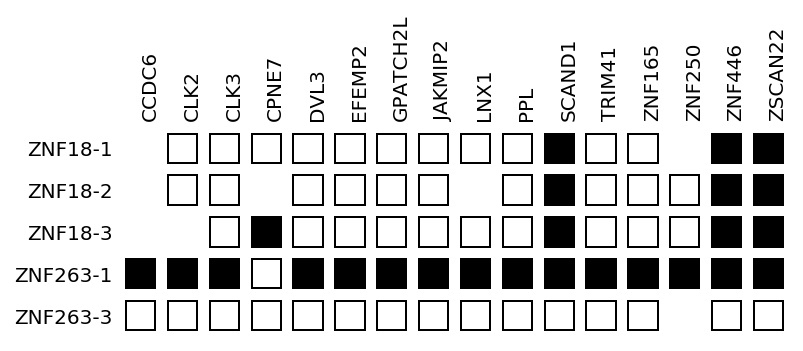

In [5]:
fig, ax = plt.subplots(1, 1)
gene_a = 'ZNF18'
gene_b = 'ZNF263'
y2h_ppi_per_paralog_pair_plot(gene_a, gene_b, y2h, ax=ax)

In [6]:
df.loc[df['tf_gene_a'].isin([gene_a, gene_b]) &
       df['tf_gene_b'].isin([gene_a, gene_b]), :]

,tf_gene_a,tf_gene_b,clone_acc_a,clone_acc_b,category,pair,ppi_n_tested,ppi_n_shared,ppi_n_min,ppi_n_min_diff,ppi_jaccard,ppi_simpson,ppi_n_diff,pdi_n_tested,pdi_n_shared,pdi_n_min,pdi_n_min_diff,pdi_jaccard,pdi_simpson,pdi_n_diff,activation_fold_change,aa_seq_pct_id
0,ZNF18,ZNF263,ZNF18|1/3|07G04,ZNF263|1/3|11C01,paralogs,ZNF18|1/3|07G04_ZNF263|1/3|11C01,18.0,3.0,3.0,0.0,0.166667,1.00,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.264689,30.448384
1,ZNF18,ZNF263,ZNF18|1/3|07G04,ZNF263|3/3|05A08,paralogs,ZNF18|1/3|07G04_ZNF263|3/3|05A08,4.0,0.0,0.0,0.0,0.000000,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.793073,21.221374
2,ZNF18,ZNF263,ZNF18|2/3|07H02,ZNF263|1/3|11C01,paralogs,ZNF18|2/3|07H02_ZNF263|1/3|11C01,18.0,3.0,3.0,0.0,0.166667,1.00,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.424876,30.508475
3,ZNF18,ZNF263,ZNF18|2/3|07H02,ZNF263|3/3|05A08,paralogs,ZNF18|2/3|07H02_ZNF263|3/3|05A08,4.0,0.0,0.0,0.0,0.000000,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.632887,21.664050
4,ZNF18,ZNF263,ZNF18|3/3|07D01,ZNF263|1/3|11C01,paralogs,ZNF18|3/3|07D01_ZNF263|1/3|11C01,19.0,3.0,4.0,1.0,0.157895,0.75,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.560961,30.540827
5,ZNF18,ZNF263,ZNF18|3/3|07D01,ZNF263|3/3|05A08,paralogs,ZNF18|3/3|07D01_ZNF263|3/3|05A08,5.0,0.0,0.0,0.0,0.000000,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.496802,21.698113
622,ZNF18,ZNF18,ZNF18|1/3|07G04,ZNF18|2/3|07H02,isoforms,ZNF18|1/3|07G04_ZNF18|2/3|07H02,4.0,4.0,4.0,0.0,1.000000,1.00,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.839813,96.300000
623,ZNF18,ZNF18,ZNF18|1/3|07G04,ZNF18|3/3|07D01,isoforms,ZNF18|1/3|07G04_ZNF18|3/3|07D01,5.0,4.0,4.0,0.0,0.800000,1.00,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.703728,96.500000
624,ZNF18,ZNF18,ZNF18|2/3|07H02,ZNF18|3/3|07D01,isoforms,ZNF18|2/3|07H02_ZNF18|3/3|07D01,4.0,4.0,4.0,0.0,1.000000,1.00,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.136085,99.800000
645,ZNF263,ZNF263,ZNF263|1/3|11C01,ZNF263|3/3|05A08,isoforms,ZNF263|1/3|11C01_ZNF263|3/3|05A08,19.0,0.0,0.0,0.0,0.000000,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.057763,22.500000


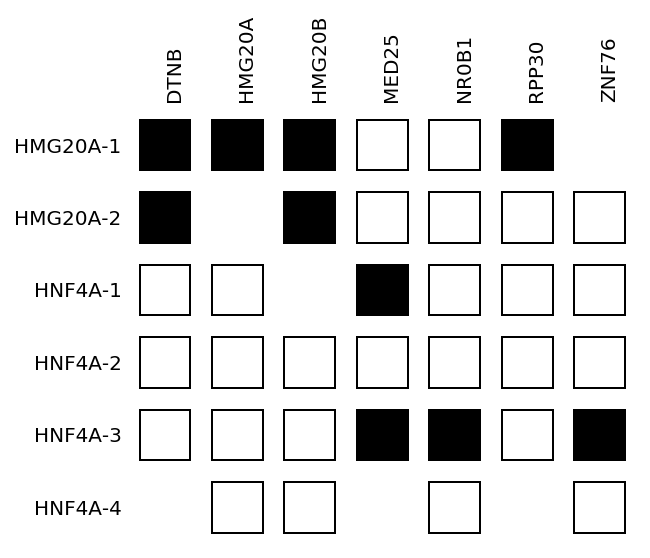

In [13]:
# non-paralog control
fig, ax = plt.subplots(1, 1)
y2h_ppi_per_paralog_pair_plot('HMG20A', 'HNF4A', y2h, ax=ax)

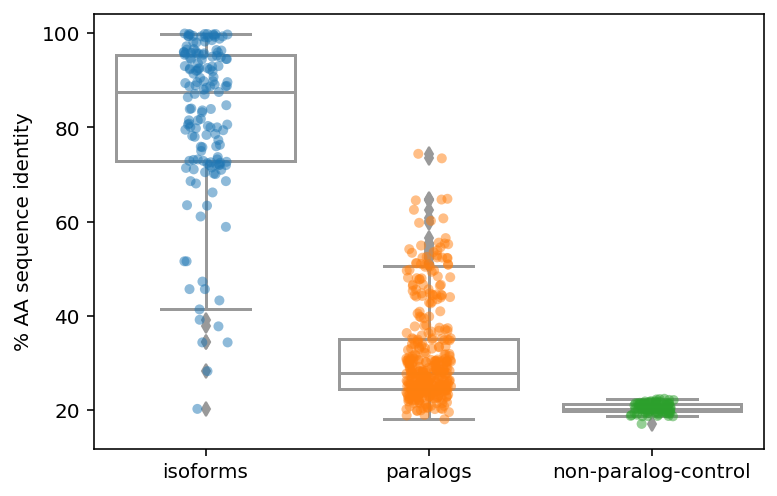

In [41]:
# sequence similarity
fig, ax = plt.subplots(1, 1)
sns.stripplot(data=df.loc[df['ppi_n_min'] > 0, :],
            x='category',
            y='aa_seq_pct_id',
            order=['isoforms', 'paralogs', 'non-paralog-control'],
            alpha=0.5,
            ax=ax)
sns.boxplot(data=df.loc[df['ppi_n_min'] > 0, :],
            x='category',
            y='aa_seq_pct_id',
            order=['isoforms', 'paralogs', 'non-paralog-control'],
            color='white',
            ax=ax)
ax.set_xlabel('')
ax.set_ylabel('% AA sequence identity')
fig.savefig('../../figures/isoforms_vs_paralogs_aa_seq_id.pdf',
            bbox_inches='tight')

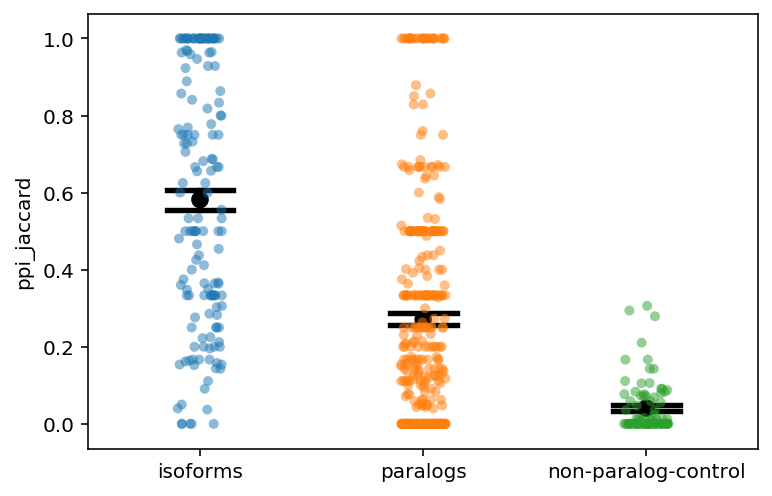

In [22]:
# cat plot with ppi jaccard
fig, ax = plt.subplots(1, 1)
sns.stripplot(data=df.loc[df['ppi_n_min'] > 0, :],
            x='category',
            y='ppi_jaccard',
            order=['isoforms', 'paralogs', 'non-paralog-control'],
            alpha=0.5,
            ax=ax)
sns.pointplot(data=df.loc[df['ppi_n_min'] > 0, :],
            x='category',
            y='ppi_jaccard',
            order=['isoforms', 'paralogs', 'non-paralog-control'],
            color='black',
            ci=68,
            capsize=0.3,
            linestyles='',
            ax=ax)
ax.set_xlabel('')
ax.set_ylabel('PPI Jaccard similarity')
fig.savefig('../../figures/isoforms_vs_paralogs_ppi_jaccard.pdf',
            bbox_inches='tight')

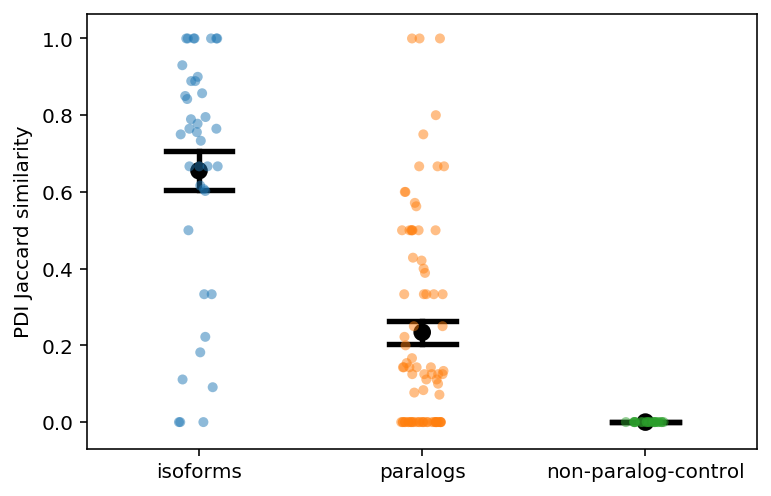

In [24]:
# PDI jaccard
fig, ax = plt.subplots(1, 1)
sns.stripplot(data=df.loc[df['pdi_n_min'] > 0, :],
            x='category',
            y='pdi_jaccard',
            order=['isoforms', 'paralogs', 'non-paralog-control'],
            alpha=0.5,
            ax=ax)
sns.pointplot(data=df.loc[df['pdi_n_min'] > 0, :],
            x='category',
            y='pdi_jaccard',
            order=['isoforms', 'paralogs', 'non-paralog-control'],
            color='black',
            ci=68,
            capsize=0.3,
            linestyles='',
            ax=ax)
ax.set_xlabel('')
ax.set_ylabel('PDI Jaccard similarity')
fig.savefig('../../figures/isoforms_vs_paralogs_pdi_jaccard.pdf',
            bbox_inches='tight')

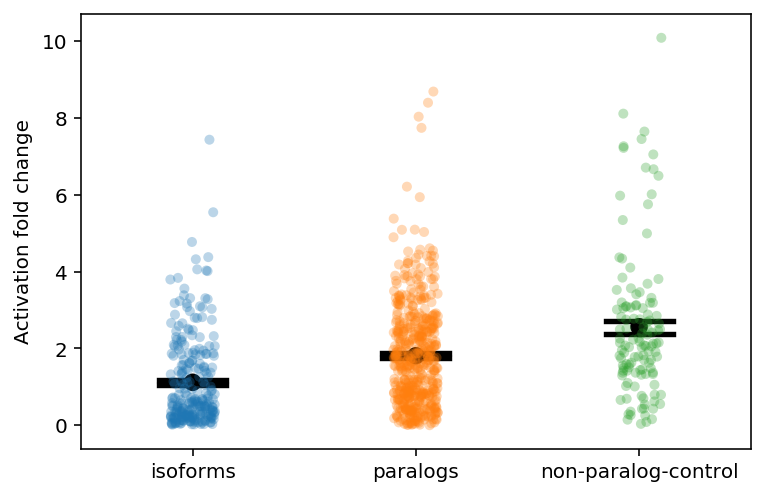

In [34]:
# activation change
fig, ax = plt.subplots(1, 1)
sns.stripplot(data=df.loc[:, :],
            x='category',
            y='activation_fold_change',
            order=['isoforms', 'paralogs', 'non-paralog-control'],
            alpha=0.3,
            ax=ax)
sns.pointplot(data=df.loc[:, :],
            x='category',
            y='activation_fold_change',
            order=['isoforms', 'paralogs', 'non-paralog-control'],
            color='black',
            ci=68,
            capsize=0.3,
            linestyles='',
            ax=ax)
ax.set_xlabel('')
ax.set_ylabel('Activation fold change')
fig.savefig('../../figures/isoforms_vs_paralogs_activation.pdf',
            bbox_inches='tight')

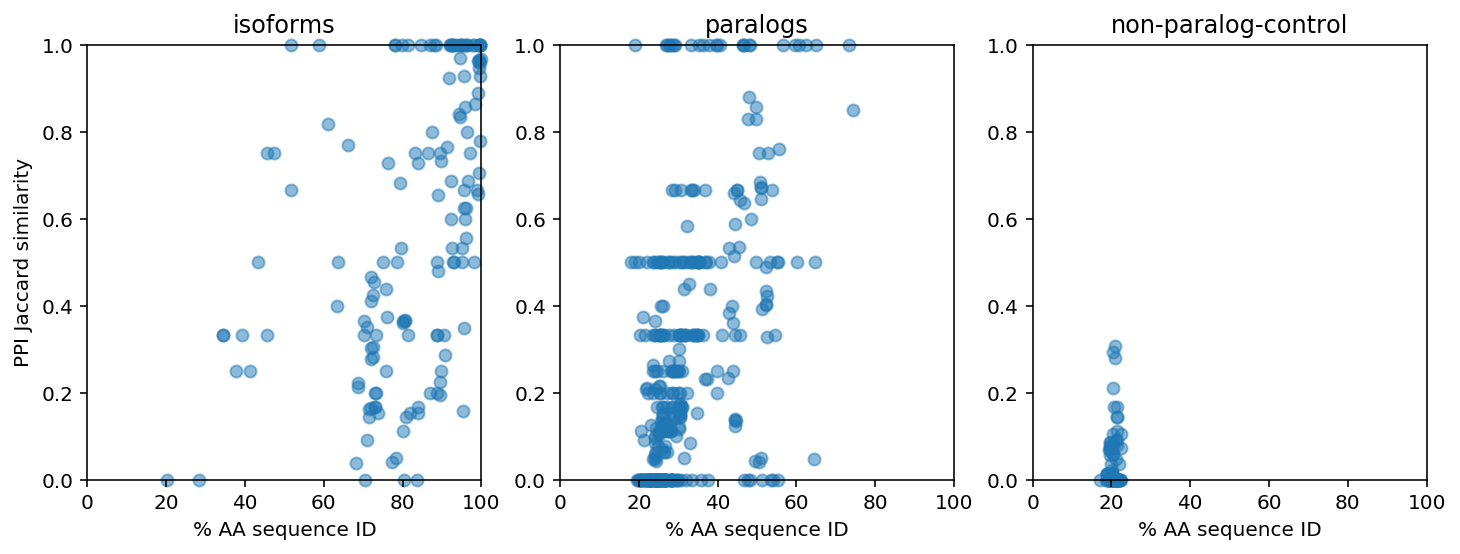

In [8]:
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(12, 4)

for cat, ax in zip(['isoforms', 'paralogs', 'non-paralog-control'], axes):
    xy = df.loc[(df['category'] == cat) &
           (df['ppi_n_min'] > 0),
            ['aa_seq_pct_id', 'ppi_jaccard']].values
    ax.scatter(xy[:, 0], xy[:, 1],
               clip_on=False, alpha=0.5)
    ax.set_xlabel('% AA sequence ID')
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 1)
    ax.set_title(cat)
axes[0].set_ylabel('PPI Jaccard similarity')
fig.savefig('../../figures/isoforms_vs_paralogs_aa_id_vs_ppi_jaccard_panels.pdf')

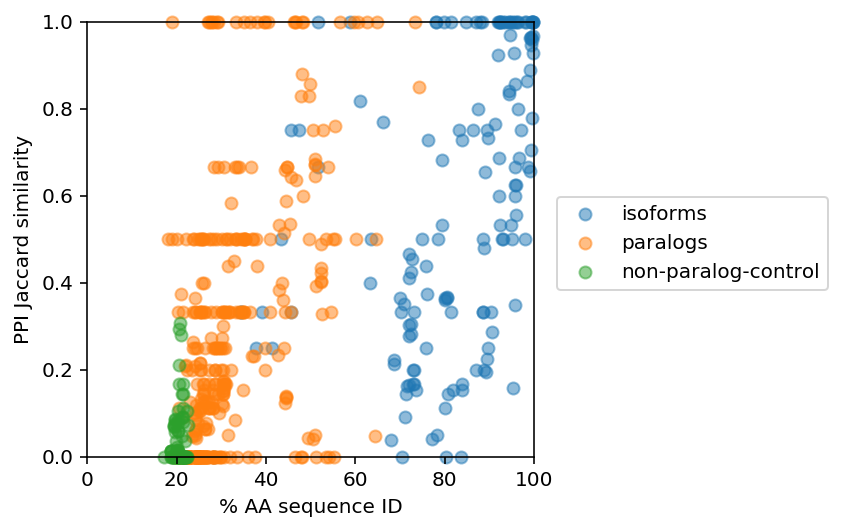

In [69]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)

for cat in ['isoforms', 'paralogs', 'non-paralog-control']:
    xy = df.loc[(df['category'] == cat) &
           (df['ppi_n_min'] > 0),
            ['aa_seq_pct_id', 'ppi_jaccard']].values
    ax.scatter(xy[:, 0], 
               xy[:, 1],
               clip_on=False, 
               alpha=0.5,
               label=cat)
ax.set_xlabel('% AA sequence ID')
ax.set_xlim(0, 100)
ax.set_ylim(0, 1)
ax.set_ylabel('PPI Jaccard similarity')
fig.legend(loc='center left', bbox_to_anchor=[0.95, 0.5])
fig.savefig('../../figures/isoforms_vs_paralogs_aa_id_vs_ppi_jaccard_onefig.pdf',
            bbox='tight')

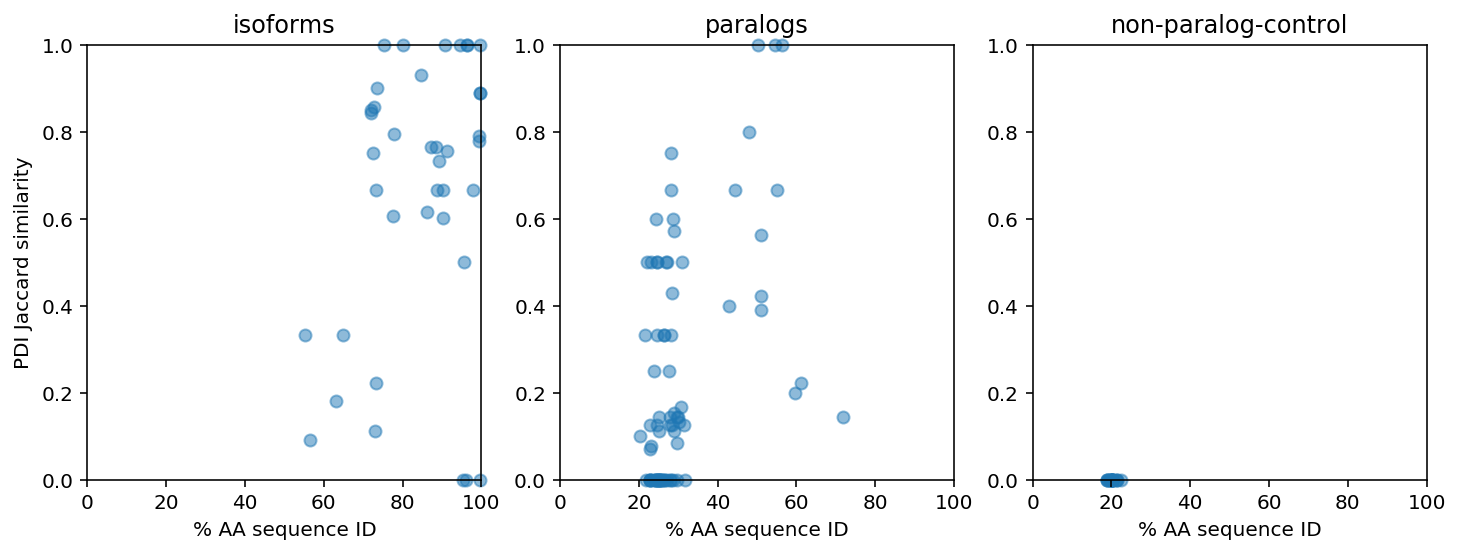

In [61]:
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(12, 4)

for cat, ax in zip(['isoforms', 'paralogs', 'non-paralog-control'], axes):
    xy = df.loc[(df['category'] == cat) &
           (df['pdi_n_min'] > 0),
            ['aa_seq_pct_id', 'pdi_jaccard']].values
    ax.scatter(xy[:, 0], xy[:, 1],
               clip_on=False, alpha=0.5)
    ax.set_xlabel('% AA sequence ID')
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 1)
    ax.set_title(cat)
axes[0].set_ylabel('PDI Jaccard similarity')
fig.savefig('../../figures/isoforms_vs_paralogs_aa_id_vs_pdi_jaccard_panels.pdf')

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:3399: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= 

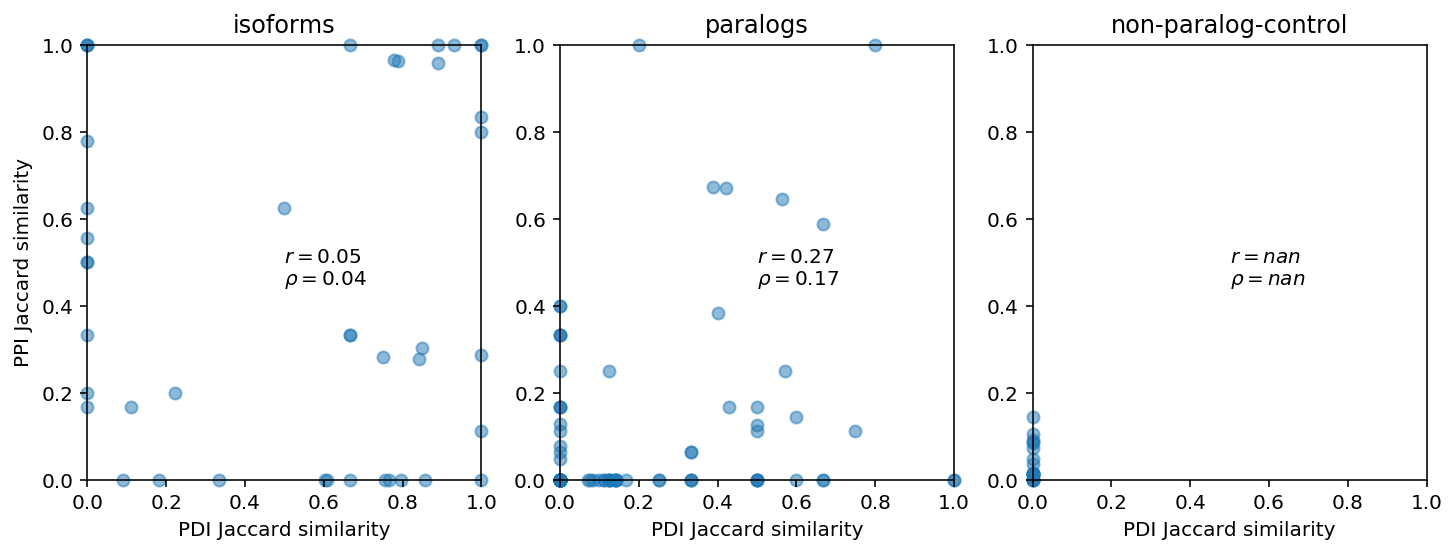

In [56]:
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(12, 4)

for cat, ax in zip(['isoforms', 'paralogs', 'non-paralog-control'], axes):
    xy = df.loc[(df['category'] == cat) &
                ((df['ppi_n_min'] > 0) |
                 (df['pdi_n_min'] > 0)) &
                 df['ppi_jaccard'].notnull() &
                 df['pdi_jaccard'].notnull(),
            ['pdi_jaccard', 'ppi_jaccard']].values
    ax.scatter(xy[:, 0], xy[:, 1],
               clip_on=False, alpha=0.5)
    ax.set_xlabel('PDI Jaccard similarity')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(cat)
    ax.text(0.5, 0.5, r'$r = {:.2f}$'.format(stats.pearsonr(xy[:, 0], xy[:, 1])[0]))
    ax.text(0.5, 0.45, r'$\rho = {:.2f}$'.format(stats.spearmanr(xy[:, 0], xy[:, 1])[0]))
axes[0].set_ylabel('PPI Jaccard similarity')
fig.savefig('../../figures/isoforms_vs_paralogs_aa_id_vs_ppi_jaccard_panels.pdf')